In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('info_dec.csv')

In [3]:
data

,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp
0,0,35,(-147+14j),-84.559668,147.665162,-0.704682,10.00
1,0,35,(-141-43j),-106.959847,147.410990,-0.891368,10.25
2,0,35,(-111-103j),-132.859099,151.426550,-1.107228,10.50
3,0,35,(-65-141j),-155.250634,155.261070,-1.293865,10.75
4,0,35,(150+18j),83.157227,151.076140,0.692994,12.00
...,...,...,...,...,...,...,...
7587,25,9,(-305-370j),-140.500411,479.504953,-1.170918,4052.75
7588,25,9,(-183+432j),-22.958055,469.162019,-0.191317,4054.00
7589,25,9,(2+466j),0.245903,466.004292,0.002049,4054.25
7590,25,9,(209+416j),26.675129,465.550212,0.222293,4054.50


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C3C11E48>],
      dtype=object)

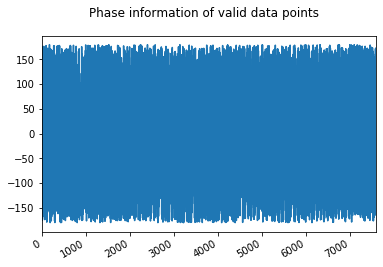

In [4]:
data['phi_info'].plot(subplots=True, title="Phase information of valid data points")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C3FD1288>],
      dtype=object)

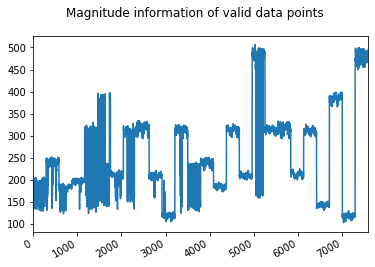

In [5]:
data['mag_info'].plot(subplots=True, title="Magnitude information of valid data points")

# Groupping the data pased on channel
Here I grouped the data based on it's cahnnel. Each graph represents the phase info in each channel. Yet I don't undrestand why it looks like this? Plus, I can't relate to the x grid!  

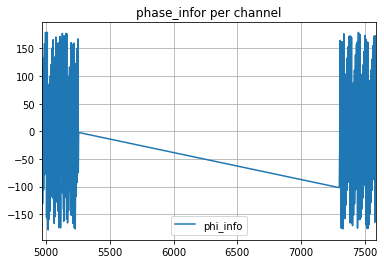

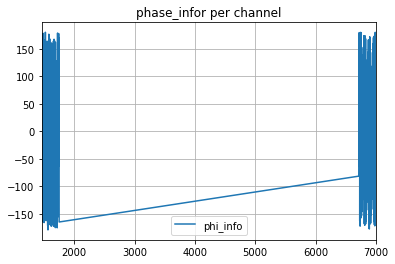

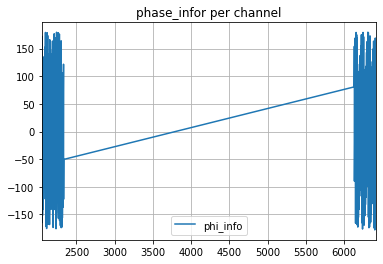

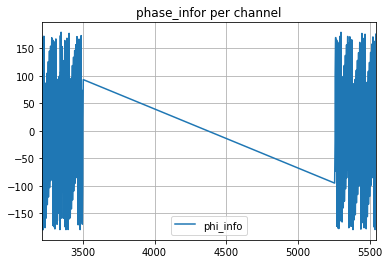

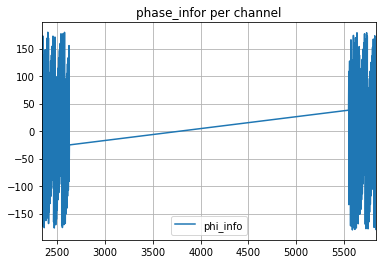

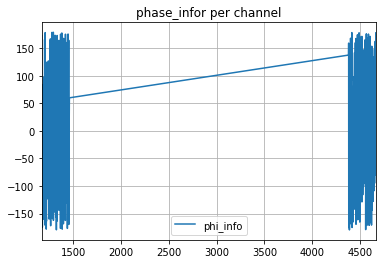

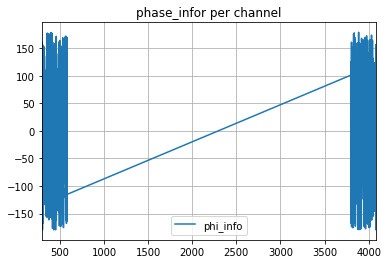

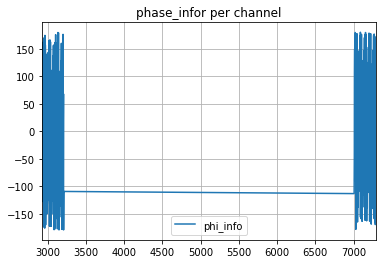

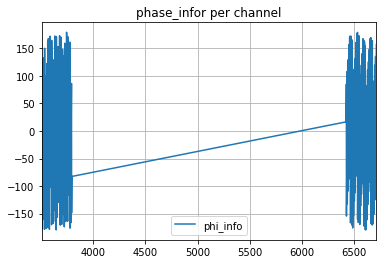

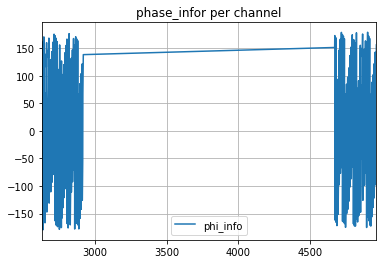

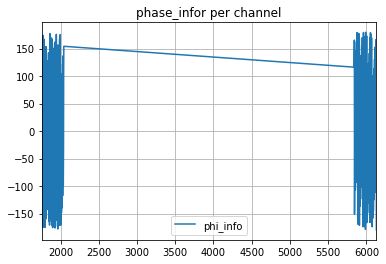

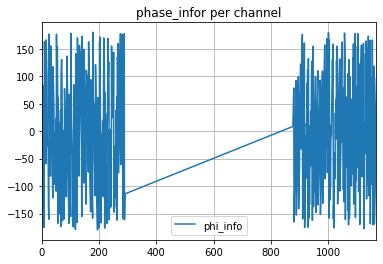

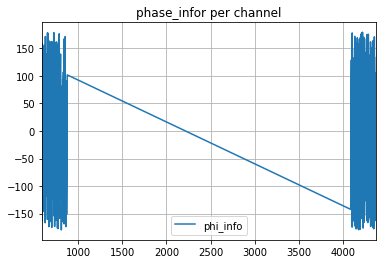

In [6]:
grouped = data.groupby('Channel')
axes = grouped[['phi_info']].plot(title="phase_infor per channel", grid=True)

In [8]:
indexed = data.set_index(['Channel'])
indexed

,pkt,ant_info,phi_info,mag_info,theta_info,time_stamp
Channel,,,,,,
35,0,(-147+14j),-84.559668,147.665162,-0.704682,10.00
35,0,(-141-43j),-106.959847,147.410990,-0.891368,10.25
35,0,(-111-103j),-132.859099,151.426550,-1.107228,10.50
35,0,(-65-141j),-155.250634,155.261070,-1.293865,10.75
35,0,(150+18j),83.157227,151.076140,0.692994,12.00
...,...,...,...,...,...,...
9,25,(-305-370j),-140.500411,479.504953,-1.170918,4052.75
9,25,(-183+432j),-22.958055,469.162019,-0.191317,4054.00
9,25,(2+466j),0.245903,466.004292,0.002049,4054.25


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C6A1E888>],
      dtype=object)

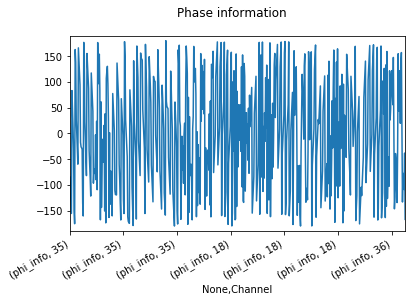

In [9]:
indexed.unstack(level=0)[['phi_info']].plot(subplots=True, title="Phase information", xlim=[0,624], ylim=[-190,+190])

Here is the Phase change in each channel! the phase increases to 180 and then drops down after each sample. 
The max and min is the range of change of phase. 
Here we didn't separate the antennas in each array. as a result, the data we see is: A1 A2 A3 A4, A1 A2 A3 A4, ... 
this happens 73 tims! 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C7C2F648>],
      dtype=object)

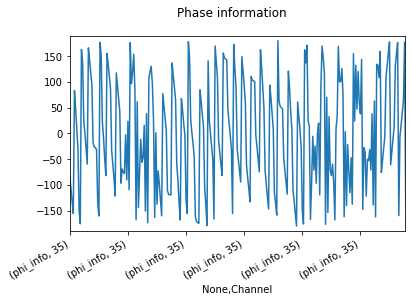

In [10]:
indexed.unstack(level=0)[['phi_info']].plot(subplots=True, title="Phase information", xlim=[0,288], ylim=[-190,+190])

## here is the Magnitude of the valid IQ samples per channel. This mag stays the say at each channel! 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C810E088>],
      dtype=object)

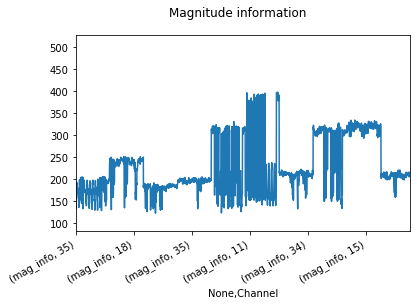

In [20]:
indexed.unstack(level=0)[['mag_info']].plot(subplots=True, title="Magnitude information", xlim=[0,288*10])

# Now adding the frequency for each channel
first, introducing w as center frequency of each channel!

In [21]:
w = []
for n in range(0,11):
    w.append(2404.25 + n*2)
print(w)
for n in range(11, 37):
    w.append(2428.25 + (n-11)*2)
print(w)

[2404.25, 2406.25, 2408.25, 2410.25, 2412.25, 2414.25, 2416.25, 2418.25, 2420.25, 2422.25, 2424.25]
[2404.25, 2406.25, 2408.25, 2410.25, 2412.25, 2414.25, 2416.25, 2418.25, 2420.25, 2422.25, 2424.25, 2428.25, 2430.25, 2432.25, 2434.25, 2436.25, 2438.25, 2440.25, 2442.25, 2444.25, 2446.25, 2448.25, 2450.25, 2452.25, 2454.25, 2456.25, 2458.25, 2460.25, 2462.25, 2464.25, 2466.25, 2468.25, 2470.25, 2472.25, 2474.25, 2476.25, 2478.25]


In [22]:
channel = np.arange(0,37,1)
BLE_freq = pd.DataFrame({"Channel":channel, "Frequency": w})
BLE_freq['Frequency'] = BLE_freq['Frequency']*360*10**-6

# sampling time per channel ~ 160us
Here I manually am changing the sampling time per channel. Because it will create extra turns along the 360 degrees if we multiply the actuall data. 
As a result, I only multiply once the time is between 10us to 160us 
### Timing per pkt
- 4us : guard (no sampling here)
- 8us : the reference with 32 samples (sampling starts here)
- 157us: sampling happens here, also the switching time is here. each 1us has 4 sampls. as a result we have 292 sampls finally. in each pkt with 4 antenna, only 288 of this data is a complete period of ant_array. 

In [23]:

data['time_per_channel'] = data['time_stamp']
for i in range(0, len(data)- 292, 292):
    data['time_per_channel'][i+292:i+2*292] = data['time_stamp'][0:292]
   

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
print(data['time_stamp'][291], data['Channel'][292], data['Channel'][291], data['time_stamp'][294])

154.75 18 35 166.5


In [27]:
data

,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp,time_per_channel
0,0,35,(-147+14j),-84.559668,147.665162,-0.704682,10.00,10.00
1,0,35,(-141-43j),-106.959847,147.410990,-0.891368,10.25,10.25
2,0,35,(-111-103j),-132.859099,151.426550,-1.107228,10.50,10.50
3,0,35,(-65-141j),-155.250634,155.261070,-1.293865,10.75,10.75
4,0,35,(150+18j),83.157227,151.076140,0.692994,12.00,12.00
...,...,...,...,...,...,...,...,...
7587,25,9,(-305-370j),-140.500411,479.504953,-1.170918,4052.75,152.75
7588,25,9,(-183+432j),-22.958055,469.162019,-0.191317,4054.00,154.00
7589,25,9,(2+466j),0.245903,466.004292,0.002049,4054.25,154.25
7590,25,9,(209+416j),26.675129,465.550212,0.222293,4054.50,154.50


In [28]:
omegat = []
for i in range(37):
    channel_posi = np.where(data['Channel'] == i)
    channel_posi_arr = np.array(channel_posi)
    if np.any(channel_posi_arr) == True:
        data['wt_per_cahnnel'] = (360*w[i]*10**-6*data['time_per_channel']) # w is in radian --> omegat in angle = omegat(rad)* 180/pi)
#         print(omegat)
data

,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp,time_per_channel,wt_per_cahnnel
0,0,35,(-147+14j),-84.559668,147.665162,-0.704682,10.00,10.00,8.921700
1,0,35,(-141-43j),-106.959847,147.410990,-0.891368,10.25,10.25,9.144742
2,0,35,(-111-103j),-132.859099,151.426550,-1.107228,10.50,10.50,9.367785
3,0,35,(-65-141j),-155.250634,155.261070,-1.293865,10.75,10.75,9.590827
4,0,35,(150+18j),83.157227,151.076140,0.692994,12.00,12.00,10.706040
...,...,...,...,...,...,...,...,...,...
7587,25,9,(-305-370j),-140.500411,479.504953,-1.170918,4052.75,152.75,136.278967
7588,25,9,(-183+432j),-22.958055,469.162019,-0.191317,4054.00,154.00,137.394180
7589,25,9,(2+466j),0.245903,466.004292,0.002049,4054.25,154.25,137.617222
7590,25,9,(209+416j),26.675129,465.550212,0.222293,4054.50,154.50,137.840265


# Calculating the phase with respect to the time
For each channel, the wt (omega.t) is calculated separatly. This value is in radian. So, we concert it to degrees by: * 180/pi
As a result, the answer will be between -180 to 180 degrees. 
Yet, if:
real_phi = phi_info - wt_per_channel 
no furthur calculations is needed. 
- Now the angle will be between -360 to +360 degrees! 
why? because:
    -180< phi_info<+180
    -180 < -wt_per_channel< +180
therefore --> -180< phi_info<+180 + -180 < -wt_per_channel< +180 --> -360 < real_phi < +360

In [29]:
data['real_phase'] =  data['wt_per_cahnnel'] - data['phi_info']
data

,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp,time_per_channel,wt_per_cahnnel,real_phase
0,0,35,(-147+14j),-84.559668,147.665162,-0.704682,10.00,10.00,8.921700,93.481368
1,0,35,(-141-43j),-106.959847,147.410990,-0.891368,10.25,10.25,9.144742,116.104590
2,0,35,(-111-103j),-132.859099,151.426550,-1.107228,10.50,10.50,9.367785,142.226884
3,0,35,(-65-141j),-155.250634,155.261070,-1.293865,10.75,10.75,9.590827,164.841461
4,0,35,(150+18j),83.157227,151.076140,0.692994,12.00,12.00,10.706040,-72.451187
...,...,...,...,...,...,...,...,...,...,...
7587,25,9,(-305-370j),-140.500411,479.504953,-1.170918,4052.75,152.75,136.278967,276.779379
7588,25,9,(-183+432j),-22.958055,469.162019,-0.191317,4054.00,154.00,137.394180,160.352235
7589,25,9,(2+466j),0.245903,466.004292,0.002049,4054.25,154.25,137.617222,137.371319
7590,25,9,(209+416j),26.675129,465.550212,0.222293,4054.50,154.50,137.840265,111.165136


# Converting the angle to the [-180, 180] range:

In [32]:
for i in range(len(data)):
    if data['real_phase'][i] < 0:
        data['real_phase'][i] = data['real_phase'][i] + 360
data

,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp,time_per_channel,wt_per_cahnnel,real_phase
0,0,35,(-147+14j),-84.559668,147.665162,-0.704682,10.00,10.00,8.921700,93.481368
1,0,35,(-141-43j),-106.959847,147.410990,-0.891368,10.25,10.25,9.144742,116.104590
2,0,35,(-111-103j),-132.859099,151.426550,-1.107228,10.50,10.50,9.367785,142.226884
3,0,35,(-65-141j),-155.250634,155.261070,-1.293865,10.75,10.75,9.590827,164.841461
4,0,35,(150+18j),83.157227,151.076140,0.692994,12.00,12.00,10.706040,287.548813
...,...,...,...,...,...,...,...,...,...,...
7587,25,9,(-305-370j),-140.500411,479.504953,-1.170918,4052.75,152.75,136.278967,276.779379
7588,25,9,(-183+432j),-22.958055,469.162019,-0.191317,4054.00,154.00,137.394180,160.352235
7589,25,9,(2+466j),0.245903,466.004292,0.002049,4054.25,154.25,137.617222,137.371319
7590,25,9,(209+416j),26.675129,465.550212,0.222293,4054.50,154.50,137.840265,111.165136


### Now convert to [-180,180] range
Now for phi > 180, the values should be diffrenciated by 360. As a result the total will be between [-180,180]

In [33]:
for i in range(len(data)):
    if data['real_phase'][i] > 180:
        data['real_phase'][i] = data['real_phase'][i] - 360
data

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pkt,Channel,ant_info,phi_info,mag_info,theta_info,time_stamp,time_per_channel,wt_per_cahnnel,real_phase
0,0,35,(-147+14j),-84.559668,147.665162,-0.704682,10.00,10.00,8.921700,93.481368
1,0,35,(-141-43j),-106.959847,147.410990,-0.891368,10.25,10.25,9.144742,116.104590
2,0,35,(-111-103j),-132.859099,151.426550,-1.107228,10.50,10.50,9.367785,142.226884
3,0,35,(-65-141j),-155.250634,155.261070,-1.293865,10.75,10.75,9.590827,164.841461
4,0,35,(150+18j),83.157227,151.076140,0.692994,12.00,12.00,10.706040,-72.451187
...,...,...,...,...,...,...,...,...,...,...
7587,25,9,(-305-370j),-140.500411,479.504953,-1.170918,4052.75,152.75,136.278967,-83.220621
7588,25,9,(-183+432j),-22.958055,469.162019,-0.191317,4054.00,154.00,137.394180,160.352235
7589,25,9,(2+466j),0.245903,466.004292,0.002049,4054.25,154.25,137.617222,137.371319
7590,25,9,(209+416j),26.675129,465.550212,0.222293,4054.50,154.50,137.840265,111.165136


# Plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C8267FC8>],
      dtype=object)

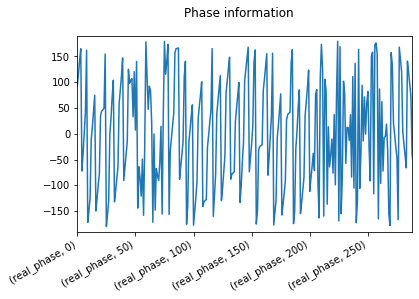

In [34]:
data.unstack(level=0)[['real_phase']].plot(subplots=True, title="Phase information", xlim=[0,288], ylim=[-190, +190])

In [262]:
# data.to_csv('time_added_data.csv', index = False)

## Separating each antenna per channel

In [35]:
data_size = len(data)
N = int(data_size/288)
info_per_ant = []
for n in range(N):
    for k in range(0 + n*288, 288*(n+1), 4):
        info_per_ant.append({"pkt": data['pkt'][k], 
                             "channel": data['Channel'][k], 
                             "phi_ant1": data['real_phase'][k + 3],
                             "phi_ant2": data['real_phase'][k], 
                             "phi_ant3": data['real_phase'][k + 1]})
result = pd.DataFrame(info_per_ant)

In [36]:
result

,pkt,channel,phi_ant1,phi_ant2,phi_ant3
0,0,35,164.841461,93.481368,116.104590
1,0,35,41.120049,-72.451187,-37.401835
2,0,35,-125.231832,162.255803,-172.075044
3,0,35,74.564721,-11.071456,14.175879
4,0,35,-77.425666,-149.984496,-126.389119
...,...,...,...,...,...
1867,25,9,1.177180,72.874132,49.604104
1868,25,9,169.963790,-119.031587,-141.787522
1869,25,9,-15.058701,57.702649,34.188145
1870,25,9,161.108094,-130.396750,-153.994906


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C809C4C8>],
      dtype=object)

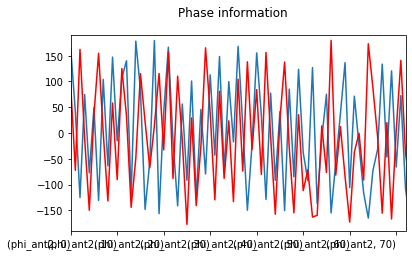

In [37]:
result.unstack(level=0)[['phi_ant1']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190])
result.unstack(level=0)[['phi_ant2']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'red')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C936F608>],
      dtype=object)

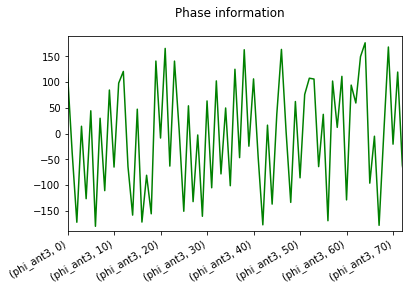

In [38]:
result.unstack(level=0)[['phi_ant3']].plot(subplots=True, title="Phase information", xlim=[0,72], ylim=[-190,+190], color = 'green')

In [40]:
phi_3 = result['phi_ant3'][0:72]
phi_2 = result['phi_ant2'][0:72] 
phi_1 = result['phi_ant1'][0:72]
print(np.average(phi_1), np.average(phi_2), np.average(phi_3))

3.90193307904483 -8.615408181459294 -2.3469425917241944


In [41]:
phi_channel = []
for i in range(0, len(result), 72):
    phi_channel.append({"pkt": result['pkt'][i], "channel":result['channel'][i], 
                       "ave_phi1": np.average(result['phi_ant1'][i-72:i]),
                       "ave_phi2": np.average(result['phi_ant2'][i-72:i]), 
                       "ave_phi3": np.average(result['phi_ant3'][i-72:i])
                       })
average_phi_perchannel = pd.DataFrame(phi_channel)
average_phi_perchannel=  average_phi_perchannel.drop([0])
# average_phi_perchannel.to_csv('average_phi_perchannel.csv', index = False)          

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000199C93AC288>],
      dtype=object)

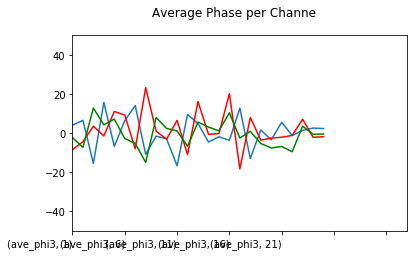

In [42]:
average_phi_perchannel.unstack(level=0)[['ave_phi1']].plot(subplots=True, title="Average Phase per Channel", xlim=[0,32], ylim=[-50,+50])
average_phi_perchannel.unstack(level=0)[['ave_phi2']].plot(subplots=True, title="Average Phase per Channe", xlim=[0,32], ylim=[-50,+50], color = 'red')
average_phi_perchannel.unstack(level=0)[['ave_phi3']].plot(subplots=True, title="Average Phase per Channe", xlim=[0,32], ylim=[-50,+50], color = 'green')


In [43]:
print('Ant1_phi_average',  np.average(average_phi_perchannel['ave_phi1']), 
     '\nAnt2_phi_average', np.average(average_phi_perchannel['ave_phi2']), 
     '\nAnt3_phi_average', np.average(average_phi_perchannel['ave_phi3']))

Ant1_phi_average 0.14083698854804866 
Ant2_phi_average 1.4000934826279454 
Ant3_phi_average -0.5421763294045248
